# **Image Processing Pipeline Setup**

The first thing we need to be able to do is access the image files and interact with them (e.g., read the metadata and visualize the image). The following notebook walks you through the steps used in all of the `part_1_segmentation_workflow` notebooks to load your image of choice. 

### 👣 **Summary of steps**  

**IMPORTS**

- **`Step 1`** - load all python packages necessary for this notebooks

**LOAD AND READ IN IMAGE FOR PROCESSING**

- **`Step 2`** - Select image from file list
- **`Step 3`** - Load image into memory and print the associated metadata

**VIZUALIZE THE IMAGE**

- **`Step 4`** - View the image using Napari
-----

## **Image Format**
### ➡️ Input image formatting:
The `infer-subc` segmentation workflows are optimized for use on fluoresence confocal microscopy images at ~63X magnification.

We have tested the following file formats as input in both the Napari plugin and the notesbooks:

- Single or multi-channel ".tiff"/".tif" or ".czi" files
- Compatable with 2D (single Z-plane) or 3D (Z-stack) images
- Dimension order: CZYX

*<ins>Note:</ins> We are utilizing [`AICSImageIO`](https://allencellmodeling.github.io/aicsimageio/aicsimageio.aics_image.AICSImage.html) AICSImage reader under the hood to import images and metadata, so other file types may be applicable. However, they have not yet been tested within `infer-subc`.*

### Expected segmentation output: ➡️ 

Notebooks 1.1 through 1.7, will walk you through the segmentation process for the `Cell`, `Nucleus`, `Lysosomes`, `Mitochondria`, `Golgi`, `Peroxisomes`, `Endoplasmic reticulum`, `Lipid droplets`. Segmentation outputs, whether exported from these notesbooks or from the Napari plugin during batch processing, will be saved as ".tiff" files. All segmentations will include a single channel, excepted for the "masks" output (e.g., cell, cytoplasm, nucleus) from the Napari plugin which will stack the three masks into a multichannel image.

-----


## **Using Jupyter notebooks in `infer-subc`**

> #### &#x1F4D6; **How to:** 
> 
> Advance through each block of code below by pressing `Shift`+`Enter` or pressing the "Execute Cell" (`▶️`) button to the left of each block.
> 
>
> You will see a series of instructions before each block of code. Be on the look out for the following headers and follow the instructions accordingly:
> - &#x1F3C3; **Run code; no user input required** - proceed without adding anything to the code block
> - &#x1F453; **FYI** (for your information) - helpful information usually to bring context to what is going on
> - &#x1F6D1; &#x270D; **User Input Required** - stop and input the appropriate information about your data. The following indicator will also be present in the code block:
>   ```python 
>   #### USER INPUT REQUIRED ###
>   ```

-----
## **IMPORTS**

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code block loads all of the necessary python packages and functions you will need for this notebook. The convention with notebooks (and python in general) is to import the nescessary packages as the first thing. We are using `napari` for visualization. The underlying data format are `numpy` `ndarrays`.

In [26]:
# top level imports
from pathlib import Path
import os

import napari
from napari.utils.notebook_display import nbscreenshot
import pandas as pd

from infer_subc.core.file_io import (read_czi_image, list_image_files)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


-----
## **LOAD IMAGE AND READ IMAGE METADATA**

#### &#x1F6D1; &#x270D; **User Input Required:**

Please specify the following information about your data:
- `im_type`: the file type of your image written in quotation marks; EX: ".czi" or ".tiff"
- `data_root_path`: the path to folder that contains subfolders, including your input data and a separate folder for segmentation outputs to be saved; EX: "C:/Users/{your-user-name}/Documents/Exp1"
- `in_data_path`: the path to the folder that contains your input data; EX: data_root_path / "input"
- `out_data_path`: the path to the folder where segmentation output files will be saved; EX: data_root_path / "segmentations"


Follow this example's formatting:
> ```python 
> im_type = ".czi"
> data_root_path = Path(os.path.expanduser("~")) / "Documents/Python_Scripts/Infer-subc"
> in_data_path = data_root_path / "raw"
> out_data_path = data_root_path / "out"
> ```

#### 📝 **Sample Data:**
If you would like to run the notebooks with sample data

<mark> include information about accessing sample data here; maybe referring them to the .io cite where they can learn how to clone the repo locally and use the notesbooks and sample data directly without changing any path information listed below or in any of the other notebooks </mark>

<mark> need to EVENTUALLY mention in all other notebooks that the sample data is already set up for use if the repo if cloned locally </mark>

In [3]:
#### USER INPUT REQUIRED ###
im_type = ".czi"
data_root_path = Path(os.path.expanduser("~")) / "Documents/Python_Scripts/Infer-subc"
in_data_path = data_root_path / "raw"
out_data_path = data_root_path / "out"

#### &#x1F3C3; **Run code; no user input required**
&#x1F453; **FYI:** 
- A list of the images included in the `in_data_path` folder is printed below for easy reference.
- If the `out_data_path` folder does not exist, it will be created now.

In [4]:
# Create the output directory to save the segmentation outputs in.
if not Path.exists(out_data_path):
    Path.mkdir(out_data_path)
    print(f"making {out_data_path}")

# Create a list of the file paths for each image in the input folder. Select test image path.
img_file_list = list_image_files(in_data_path,im_type)
pd.set_option('display.max_colwidth', None)
pd.DataFrame({"Image Name":img_file_list})

,Image Name
0,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\11252023_MSi08L_iPSCs_undiff_BR1_N20_Unmixing.czi
1,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\24hrs-Ctrl +oleicAcid 50uM_2_Unmixing.czi
2,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\24hrs-Ctrl +oleicAcid 50uM_3_Unmixing.czi
3,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\a24hrs-Ctrl +oleicAcid 50uM_10_Unmixing.czi
4,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\a24hrs-Ctrl +oleicAcid 50uM_4_Unmixing.czi
5,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\a24hrs-Ctrl_10_Unmixing.czi
6,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\a24hrs-Ctrl_14_Unmixing.czi
7,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\a48hrs-Ctrl + oleic acid_01_Unmixing.czi
8,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\a48hrs-Ctrl + oleic acid_02_Unmixing.czi
9,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\a48hrs-Ctrl + oleic acid_07_Unmixing.czi


#### &#x1F6D1; &#x270D; **User Input Required:**

Use the list above to specify which image you wish to analyze:
- `test_img_n`: the index, or number, associated with your image of choice from the list above.


Follow this example's formatting:
> ```python 
> test_img_n = 5
> ```

In [5]:
#### USER INPUT REQUIRED ###
test_img_n = 5

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code block reads the image and image metadata into memory. Then, the metadata is printed.

In [ ]:
# Read in the image and metadata as an ndarray and dictionary from the test image selected above. 
test_img_name = img_file_list[test_img_n]
img_data,meta_dict = read_czi_image(test_img_name)

# Define some of the metadata features.
channel_names = meta_dict['name']
meta = meta_dict['metadata']['aicsimage']
scale = meta_dict['scale']
channel_axis = meta_dict['channel_axis']
file_path = meta_dict['file_name']

print("Metadata information")
print(f"File path: {file_path}")
for i in list(range(len(channel_names))):
    print(f"Channel {i} name: {channel_names[i]}")
print(f"Scale (ZYX): {scale}")
print(f"Channel axis: {channel_axis}")

Metadata information
File path: C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw\a24hrs-Ctrl_10_Unmixing.czi
Channel 0 name: 0 :: a24hrs-Ctrl_10_Unmixing-0 :: Nuclei_Jan22
Channel 1 name: 0 :: a24hrs-Ctrl_10_Unmixing-0 :: Lyso+405_Jan22
Channel 2 name: 0 :: a24hrs-Ctrl_10_Unmixing-0 :: Mito+405_Jan22
Channel 3 name: 0 :: a24hrs-Ctrl_10_Unmixing-0 :: Golgi+405_Jan22
Channel 4 name: 0 :: a24hrs-Ctrl_10_Unmixing-0 :: Peroxy+405_Jan22
Channel 5 name: 0 :: a24hrs-Ctrl_10_Unmixing-0 :: ER+405_Jan22
Channel 6 name: 0 :: a24hrs-Ctrl_10_Unmixing-0 :: BODIPY+405low_Jan22
Channel 7 name: 0 :: a24hrs-Ctrl_10_Unmixing-0 :: Residuals
Scale: (0.3891184878080979, 0.07987165184837317, 0.07987165184837318)
Channel axis: 0


-----
## **VISUALIZE THE IMAGE**

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code block opens your image in Napari. The Napari graphical user interface (GUI) will open as a separate window. You can learn more about how to use the Napari GUI [here](https://napari.org/stable/tutorials/fundamentals/quick_start.html).


Proceed to Napari window to view your selected image.


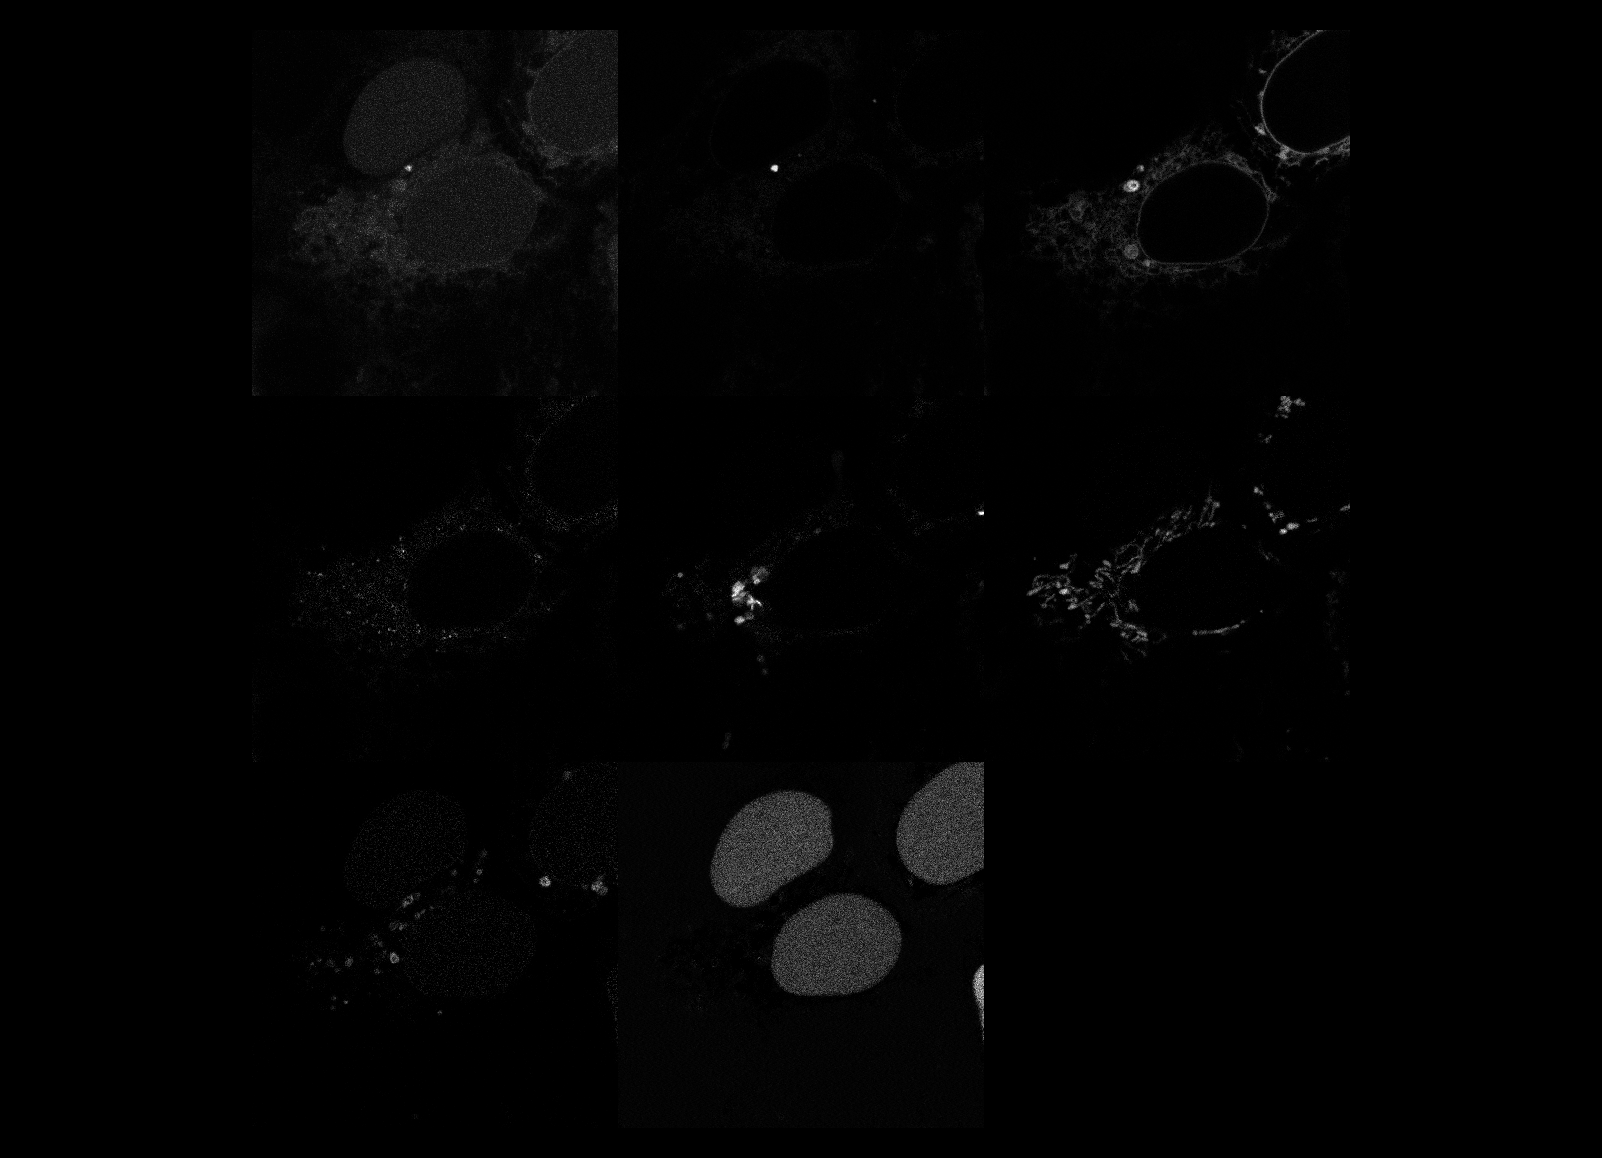

In [ ]:
# open viewer and add images
viewer = napari.Viewer()
for i in list(range(len(channel_names))):
    viewer.add_image(img_data[i],
                     scale=scale,
                     name=f"Channel {i}")
viewer.grid.enabled = True
viewer.reset_view()
    
print("Proceed to Napari window to view your selected image.")

# screenshot viewer
nbscreenshot(viewer, canvas_only = True)

--------------
### **NEXT STEPS**

Proceed to **one** of the following notebooks to segment a single cell from your images. Use the following table to decide which `Masks Workflow` is applicable to your images:

<mark>***DECISION TABLE FROM RENE HERE***</mark>


[**Masks Workflow**](./1.1_infer_masks_from-composite_with_nuc.ipynb) - for images with cytoplasmic organelles, a **nuclei** marker, no **cell membrane** makers, and more than one cell per field of view

[**Masks Workflow (A)**](./1.1a_infer_masks_from-composite_single_cell.ipynb) - for images with only cytoplasmic organelles, NO **nuclei** or **cell membrane** makers, one cell per field of view

[**Masks Workflow (B)**](./1.1b_infer_masks_from-composite_multiple-cells.ipynb) - for images with only cytoplasmic organelles, NO **nuclei** or **cell membrane** makers, and more than one cell per field of view
